# Milestone 2: baseline models
___

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import import_preprocess, baseline_models, evaluate
from importlib import reload
reload(import_preprocess)
reload(baseline_models)
reload(evaluate)

from import_preprocess import ImportPreprocess, convert_labels_to_string, convert_labels_to_int
from baseline_models import XGBoostClassifier, MajorityClassClassifier, RuleBasedClassifier, NaiveBayesClassifier, LogisticRegression, LSTM_Model, get_all_predictions

2024-12-13 14:45:49.043878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734097549.121698   64039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734097549.148634   64039 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 14:45:49.220772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
!pip install tensorflow

  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached wrapt-1.17.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 15.6 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.3 MB/s eta 0:00:00
Using cached libcl

In [18]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_val_test()
import_preprocess.create_balanced_dataset()

X_train, y_train, S_train = import_preprocess.X_train, import_preprocess.y_train, import_preprocess.S_train
X_val, y_val, S_val = import_preprocess.X_val, import_preprocess.y_val, import_preprocess.S_val
X_test, y_test, S_test = import_preprocess.X_test, import_preprocess.y_test, import_preprocess.S_test
X_balanced, y_balanced = import_preprocess.X_train_balanced, import_preprocess.y_train_balanced

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test)) 
print("Number of balanced samples:", len(X_balanced))

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000
Number of balanced samples: 10000


In [3]:
# import_preprocess.convert_class_labels()
# y_train, y_dev, y_test = import_preprocess.y_train, import_preprocess.y_dev, import_preprocess.y_test

In [3]:
#X_train_dev, y_train_val = import_preprocess.concatenate_train_val()
#len(X_train_dev)
S_train[1]

'This is like the Metallica video where the poor mutilated bastard was saying "Please kill me" over and over again, only with emojis instead of Morse code.'

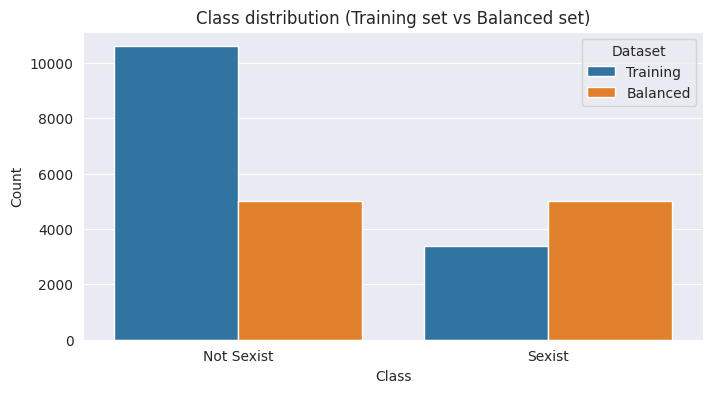

In [7]:
plot_data = pd.DataFrame({
    'Class': ['Not Sexist', 'Sexist'],
    'Training': [y_train.count('not sexist'), y_train.count('sexist')],
    'Balanced': [y_balanced.count('not sexist'), y_balanced.count('sexist')]
})
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')
plt.figure(figsize=(8, 4))
sns.barplot(x='Class', y='Count', hue='Dataset', data=plot_data_melted)
plt.title('Class distribution (Training set vs Balanced set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])
balanced_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall'])

#### a) Traditional (non-DL) baseline models

1. majority class classifier

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.7573
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################


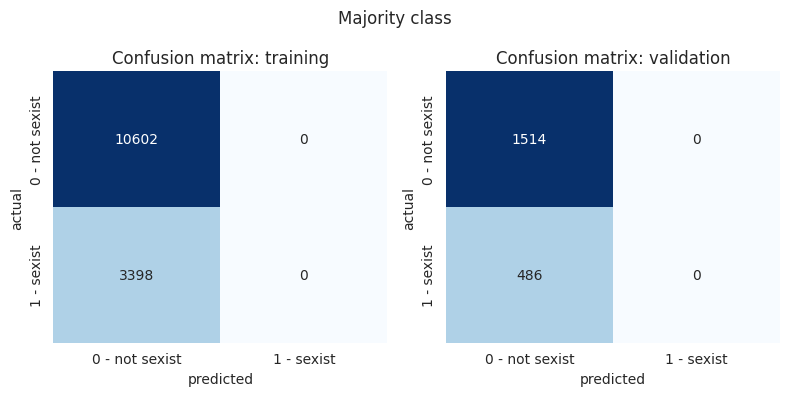

In [9]:
majority_class_classifier = MajorityClassClassifier()
majority_class_classifier.train(None, y_train, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="Majority class")
for res_x in res:
    results.loc[len(results)] = res_x

Majority class: not sexist

########################################

Metrics for training
accuracy: 0.5000
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.7570
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################


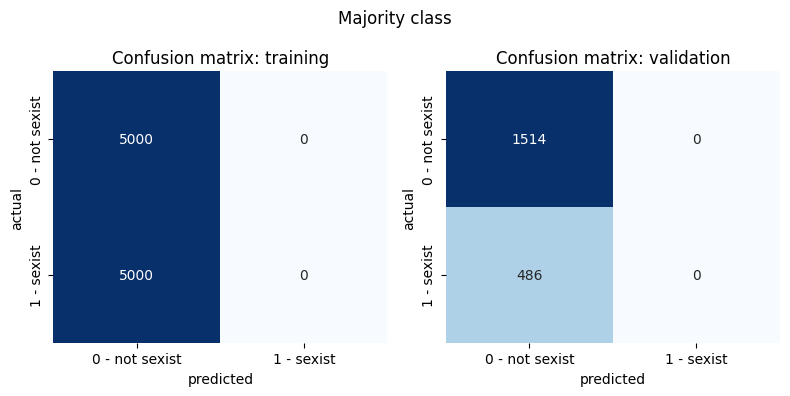

In [7]:
majority_class_classifier.train(None, y_balanced, None, None)
print(f"Majority class: {majority_class_classifier.majority_class}\n")

res = majority_class_classifier.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="Majority class")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

2. regex classifier (rule-based)

########################################

Metrics for training
accuracy: 0.7164
balanced accuracy: 0.5732
precision: 0.3890
recall: 0.2949

########################################

Metrics for validation
accuracy: 0.7075
balanced accuracy: 0.5630
precision: 0.3673
recall: 0.2819

########################################


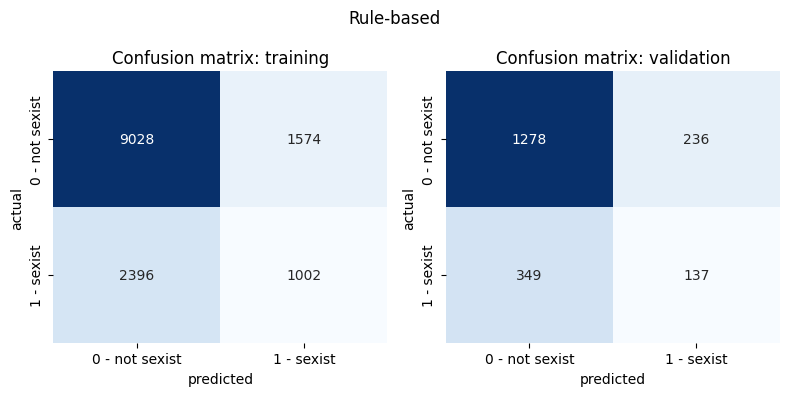

In [9]:
patterns = [
    r"\b(slut|bitch|fuck|fucking|sex)\b",
    r"\b(she has|she has to|she must|she shouldn't|women have to|women must|women shouldn't)\b",
    r"\b(hate|die)\b"
]

regex_classifier = RuleBasedClassifier(patterns)
res = regex_classifier.evaluate({"training": S_train, "validation": S_val}, [y_train, y_val], model_name="Rule-based")
for res_x in res:
    results.loc[len(results)] = res_x

3. Naive Bayes (NB)

########################################

Metrics for training
accuracy: 0.8167
balanced accuracy: 0.6664
precision: 0.7430
recall: 0.3743

########################################

Metrics for validation
accuracy: 0.7975
balanced accuracy: 0.6301
precision: 0.6884
recall: 0.3045

########################################


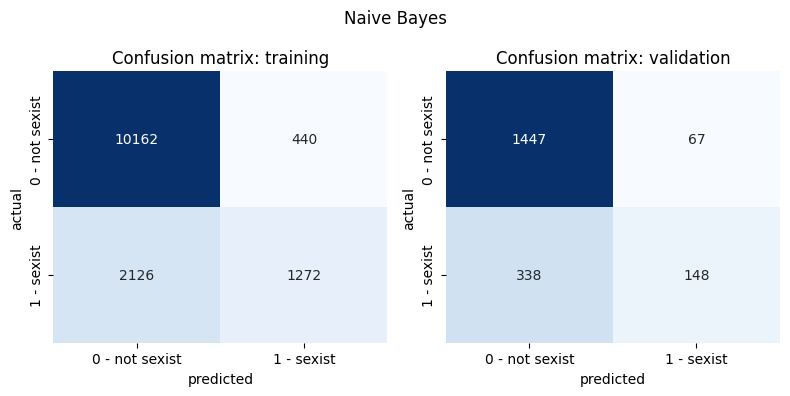

In [8]:
X_train_bow, X_val_bow, X_test_bow, X_train_val_bow, feature_names = import_preprocess.create_bow_representation()

naive_bayes_classifier = NaiveBayesClassifier()
naive_bayes_classifier.train(X_train_bow, y_train, None, None)

res = naive_bayes_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Naive Bayes")
for res_x in res:
    results.loc[len(results)] = res_x

########################################

Metrics for training
accuracy: 0.7267
balanced accuracy: 0.7267
precision: 0.7385
recall: 0.7020

########################################

Metrics for validation
accuracy: 0.7090
balanced accuracy: 0.6918
precision: 0.4348
recall: 0.6584

########################################


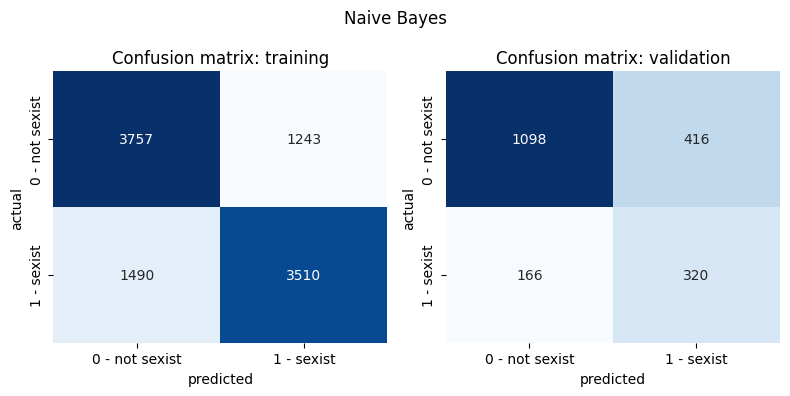

In [9]:
X_train_balanced_bow, X_val_balanced_bow, X_test_balanced_bow, X_train_val_balanced_bow, feature_names = import_preprocess.create_bow_representation(balanced=True)
naive_bayes_classifier.train(X_train_balanced_bow, y_balanced, None, None)

res = naive_bayes_classifier.evaluate({"training": X_train_balanced_bow, "validation": X_val_balanced_bow}, [y_balanced, y_val], model_name="Naive Bayes")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

4. Logisitic Regression

########################################

Metrics for training
accuracy: 0.8218
balanced accuracy: 0.6630
precision: 0.8000
recall: 0.3543

########################################

Metrics for validation
accuracy: 0.8045
balanced accuracy: 0.6271
precision: 0.7654
recall: 0.2819

########################################


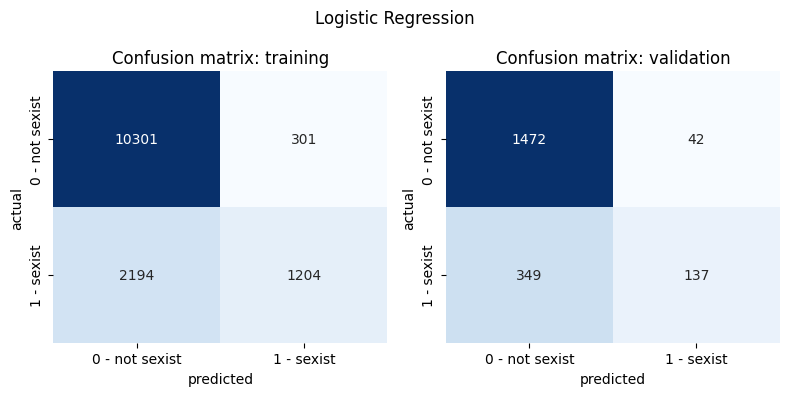

In [10]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.train(X_train_bow, y_train, None, None)

res = log_reg_classifier.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="Logistic Regression")
for res_x in res:
    results.loc[len(results)] = res_x

########################################

Metrics for training
accuracy: 0.7589
balanced accuracy: 0.7589
precision: 0.7985
recall: 0.6926

########################################

Metrics for validation
accuracy: 0.6845
balanced accuracy: 0.6135
precision: 0.3806
recall: 0.4753

########################################


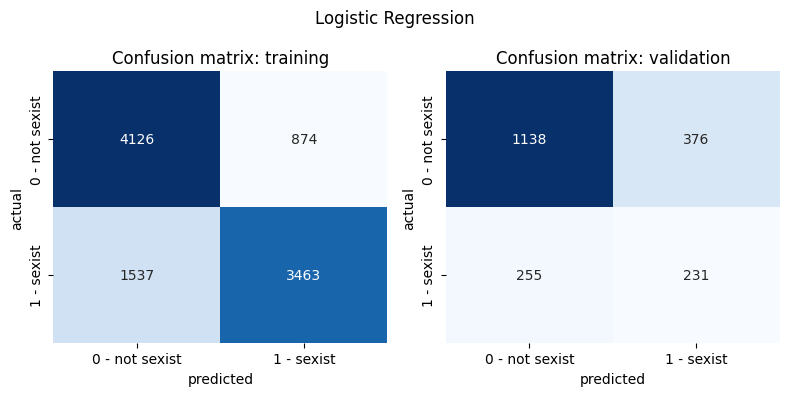

In [11]:
log_reg_classifier.train(X_train_balanced_bow, y_balanced, None, None)

res = log_reg_classifier.evaluate({"training": X_train_balanced_bow, "validation": X_val_bow}, [y_balanced, y_val], model_name="Logistic Regression")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (using BoW representation)

[0]	train-logloss:0.53193	eval-logloss:0.53723
[1]	train-logloss:0.51431	eval-logloss:0.52352
[2]	train-logloss:0.50007	eval-logloss:0.51216
[3]	train-logloss:0.48820	eval-logloss:0.50334
[4]	train-logloss:0.47855	eval-logloss:0.49671
[5]	train-logloss:0.47021	eval-logloss:0.49069
[6]	train-logloss:0.46321	eval-logloss:0.48565
[7]	train-logloss:0.45708	eval-logloss:0.48162
[8]	train-logloss:0.45157	eval-logloss:0.47800
[9]	train-logloss:0.44715	eval-logloss:0.47518
[10]	train-logloss:0.44303	eval-logloss:0.47317
[11]	train-logloss:0.43920	eval-logloss:0.47105
[12]	train-logloss:0.43602	eval-logloss:0.46948
[13]	train-logloss:0.43282	eval-logloss:0.46714
[14]	train-logloss:0.43031	eval-logloss:0.46602
[15]	train-logloss:0.42782	eval-logloss:0.46496
[16]	train-logloss:0.42549	eval-logloss:0.46407
[17]	train-logloss:0.42322	eval-logloss:0.46317
[18]	train-logloss:0.42098	eval-logloss:0.46199
[19]	train-logloss:0.41915	eval-logloss:0.46103
[20]	train-logloss:0.41745	eval-logloss:0.46053
[2

d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[53]	train-logloss:0.37936	eval-logloss:0.45563
[54]	train-logloss:0.37858	eval-logloss:0.45556
[55]	train-logloss:0.37758	eval-logloss:0.45562
[56]	train-logloss:0.37695	eval-logloss:0.45564
[57]	train-logloss:0.37602	eval-logloss:0.45566
[58]	train-logloss:0.37509	eval-logloss:0.45574
[59]	train-logloss:0.37435	eval-logloss:0.45578
[60]	train-logloss:0.37355	eval-logloss:0.45583
[61]	train-logloss:0.37283	eval-logloss:0.45618
[62]	train-logloss:0.37190	eval-logloss:0.45597
[63]	train-logloss:0.37150	eval-logloss:0.45591
[64]	train-logloss:0.37047	eval-logloss:0.45618
########################################

Metrics for training
accuracy: 0.8459
balanced accuracy: 0.6908
precision: 0.9416
recall: 0.3893

########################################

Metrics for validation
accuracy: 0.7995
balanced accuracy: 0.6126
precision: 0.7707
recall: 0.2490

########################################


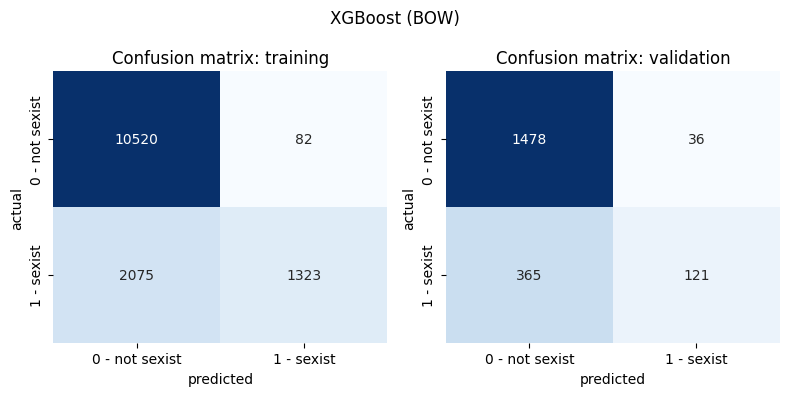

In [12]:
xg_boost_bow = XGBoostClassifier()
xg_boost_bow.train(X_train_bow, y_train, X_val_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_train_bow, "validation": X_val_bow}, [y_train, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    results.loc[len(results)] = res_x

[0]	train-logloss:0.66622	eval-logloss:0.67027


[1]	train-logloss:0.64424	eval-logloss:0.65085
[2]	train-logloss:0.62574	eval-logloss:0.63442
[3]	train-logloss:0.61011	eval-logloss:0.62102
[4]	train-logloss:0.59703	eval-logloss:0.60995
[5]	train-logloss:0.58607	eval-logloss:0.60057
[6]	train-logloss:0.57655	eval-logloss:0.59218
[7]	train-logloss:0.56824	eval-logloss:0.58502
[8]	train-logloss:0.56041	eval-logloss:0.57865
[9]	train-logloss:0.55423	eval-logloss:0.57289
[10]	train-logloss:0.54842	eval-logloss:0.56855
[11]	train-logloss:0.54344	eval-logloss:0.56440
[12]	train-logloss:0.53879	eval-logloss:0.56054
[13]	train-logloss:0.53438	eval-logloss:0.55754
[14]	train-logloss:0.53038	eval-logloss:0.55504
[15]	train-logloss:0.52683	eval-logloss:0.55231
[16]	train-logloss:0.52329	eval-logloss:0.55024
[17]	train-logloss:0.52045	eval-logloss:0.54787
[18]	train-logloss:0.51665	eval-logloss:0.54602
[19]	train-logloss:0.51427	eval-logloss:0.54417
[20]	train-logloss:0.51122	eval-logloss:0.54249
[21]	train-logloss:0.50912	eval-logloss:0.54119
[

d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[67]	train-logloss:0.41654	eval-logloss:0.52095
[68]	train-logloss:0.41518	eval-logloss:0.52093
[69]	train-logloss:0.41402	eval-logloss:0.52063
[70]	train-logloss:0.41258	eval-logloss:0.52071
[71]	train-logloss:0.41104	eval-logloss:0.52089
[72]	train-logloss:0.41013	eval-logloss:0.52071
[73]	train-logloss:0.40901	eval-logloss:0.52060
[74]	train-logloss:0.40698	eval-logloss:0.51998
[75]	train-logloss:0.40587	eval-logloss:0.51961
[76]	train-logloss:0.40514	eval-logloss:0.51996
[77]	train-logloss:0.40325	eval-logloss:0.51962
[78]	train-logloss:0.40190	eval-logloss:0.51950
[79]	train-logloss:0.40086	eval-logloss:0.51951
[80]	train-logloss:0.39961	eval-logloss:0.51925
[81]	train-logloss:0.39769	eval-logloss:0.51997
[82]	train-logloss:0.39628	eval-logloss:0.51977
[83]	train-logloss:0.39538	eval-logloss:0.51981
[84]	train-logloss:0.39437	eval-logloss:0.51952
[85]	train-logloss:0.39285	eval-logloss:0.51941
[86]	train-logloss:0.39226	eval-logloss:0.51912
[87]	train-logloss:0.39135	eval-logloss:

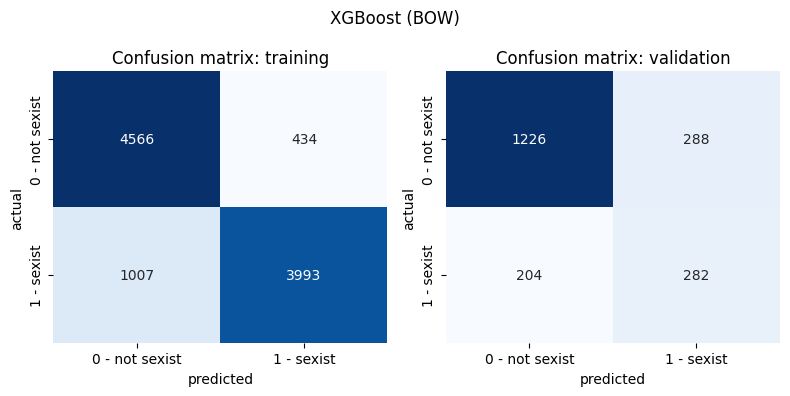

In [13]:
xg_boost_bow.train(X_train_balanced_bow, y_balanced, X_val_balanced_bow, y_val)

res = xg_boost_bow.evaluate({"training": X_train_balanced_bow, "validation": X_val_balanced_bow}, [y_balanced, y_val], model_name="XGBoost (BOW)")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

5. XGBoost (TF-IDF representation)

[0]	train-logloss:0.53122	eval-logloss:0.53678


d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-logloss:0.51275	eval-logloss:0.52299
[2]	train-logloss:0.49788	eval-logloss:0.51169
[3]	train-logloss:0.48571	eval-logloss:0.50355
[4]	train-logloss:0.47554	eval-logloss:0.49637
[5]	train-logloss:0.46681	eval-logloss:0.49024
[6]	train-logloss:0.45910	eval-logloss:0.48548
[7]	train-logloss:0.45234	eval-logloss:0.48126
[8]	train-logloss:0.44671	eval-logloss:0.47786
[9]	train-logloss:0.44195	eval-logloss:0.47528
[10]	train-logloss:0.43696	eval-logloss:0.47294
[11]	train-logloss:0.43291	eval-logloss:0.47147
[12]	train-logloss:0.42931	eval-logloss:0.46927
[13]	train-logloss:0.42573	eval-logloss:0.46759
[14]	train-logloss:0.42286	eval-logloss:0.46601
[15]	train-logloss:0.41968	eval-logloss:0.46468
[16]	train-logloss:0.41662	eval-logloss:0.46361
[17]	train-logloss:0.41413	eval-logloss:0.46255
[18]	train-logloss:0.41131	eval-logloss:0.46209
[19]	train-logloss:0.40943	eval-logloss:0.46120
[20]	train-logloss:0.40715	eval-logloss:0.46092
[21]	train-logloss:0.40512	eval-logloss:0.46027
[

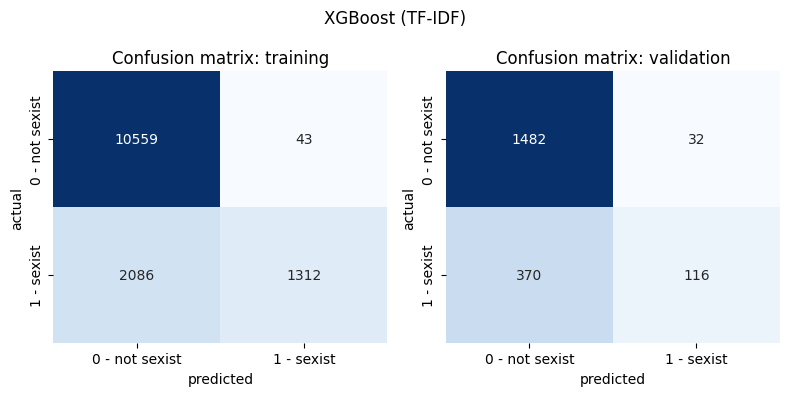

In [14]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, X_train_val_tfidf, feature_names = import_preprocess.create_tfidf_representation()

xg_boost_tfidf = XGBoostClassifier()
xg_boost_tfidf.train(X_train_tfidf, y_train, X_val_tfidf, y_val)

res = xg_boost_tfidf.evaluate({"training": X_train_tfidf, "validation": X_val_tfidf}, [y_train, y_val], model_name="XGBoost (TF-IDF)")
for res_x in res:
    results.loc[len(results)] = res_x

[0]	train-logloss:0.66636	eval-logloss:0.67032
[1]	train-logloss:0.64347	eval-logloss:0.65196
[2]	train-logloss:0.62488	eval-logloss:0.63613
[3]	train-logloss:0.60874	eval-logloss:0.62279
[4]	train-logloss:0.59498	eval-logloss:0.61123


d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-logloss:0.58322	eval-logloss:0.60200
[6]	train-logloss:0.57369	eval-logloss:0.59400
[7]	train-logloss:0.56459	eval-logloss:0.58685
[8]	train-logloss:0.55633	eval-logloss:0.58118
[9]	train-logloss:0.54963	eval-logloss:0.57602
[10]	train-logloss:0.54387	eval-logloss:0.57191
[11]	train-logloss:0.53712	eval-logloss:0.56851
[12]	train-logloss:0.53122	eval-logloss:0.56513
[13]	train-logloss:0.52637	eval-logloss:0.56161
[14]	train-logloss:0.52178	eval-logloss:0.55863
[15]	train-logloss:0.51673	eval-logloss:0.55624
[16]	train-logloss:0.51155	eval-logloss:0.55353
[17]	train-logloss:0.50831	eval-logloss:0.55106
[18]	train-logloss:0.50421	eval-logloss:0.54920
[19]	train-logloss:0.50120	eval-logloss:0.54721
[20]	train-logloss:0.49693	eval-logloss:0.54594
[21]	train-logloss:0.49455	eval-logloss:0.54389
[22]	train-logloss:0.48995	eval-logloss:0.54244
[23]	train-logloss:0.48709	eval-logloss:0.54169
[24]	train-logloss:0.48461	eval-logloss:0.54017
[25]	train-logloss:0.48095	eval-logloss:0.538

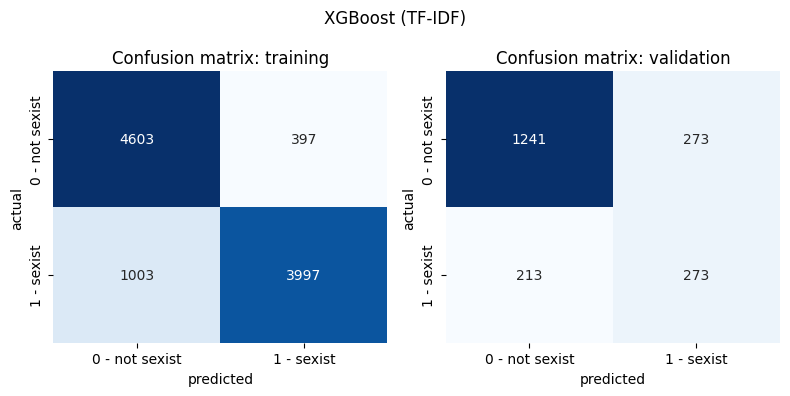

In [16]:
X_train_balanced_tfidf, X_val_balanced_tfidf, X_test_balanced_tfidf, X_train_val_balanced_tfidf, feature_names = import_preprocess.create_tfidf_representation(balanced=True)

xg_boost_tfidf.train(X_train_balanced_tfidf, y_balanced, X_val_balanced_tfidf, y_val)

res = xg_boost_tfidf.evaluate({"training": X_train_balanced_tfidf, "validation": X_val_balanced_tfidf}, [y_balanced, y_val], model_name="XGBoost (TF-IDF)")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

#### b) DL baseline models

1. LSTM

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7531 - loss: 0.5636 - val_accuracy: 0.7570 - val_loss: 0.5559
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7558 - loss: 0.5507 - val_accuracy: 0.7575 - val_loss: 0.5111
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7879 - loss: 0.4737 - val_accuracy: 0.7500 - val_loss: 0.5191
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8462 - loss: 0.3936 - val_accuracy: 0.8220 - val_loss: 0.4320
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8716 - loss: 0.3352 - val_accuracy: 0.8310 - val_loss: 0.4541
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8938 - loss: 0.2899 - val_accuracy: 0.8335 - val_loss: 0.4277
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9017 - loss: 0.2738 - val_accuracy: 0.8315 - val_loss: 0.4668
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9183 - loss: 0.2361 - 

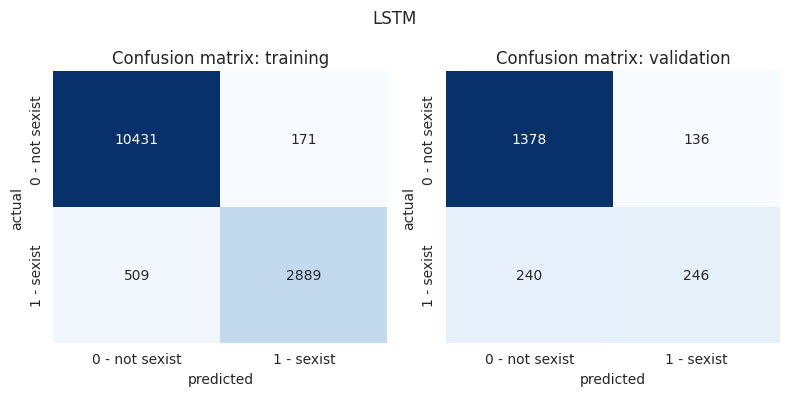

In [19]:
y_train = convert_labels_to_int(y_train)
y_balanced = convert_labels_to_int(y_balanced)
y_val = convert_labels_to_int(y_val)

rnn = LSTM_Model()
rnn.train(X_train, y_train, X_val, y_val)
res = rnn.evaluate({"training": X_train, "validation": X_val}, [y_train, y_val], model_name="LSTM")
for res_x in res:
    results.loc[len(results)] = res_x

In [ ]:
y_train = convert_labels_to_int(y_train)
y_balanced = convert_labels_to_int(y_balanced)
y_val = convert_labels_to_int(y_val)
rnn.train(X_balanced, y_balanced, X_val, y_val)
res = rnn.evaluate({"training": X_balanced, "validation": X_val}, [y_balanced, y_val], model_name="LSTM")
for res_x in res:
    balanced_results.loc[len(balanced_results)] = res_x

## Results

In [17]:
results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.757286,0.500000,0.000000,0.000000
1,Majority class,validation,0.757000,0.500000,0.000000,0.000000
2,Naive Bayes,training,0.816714,0.666418,0.742991,0.374338
3,Naive Bayes,validation,0.797500,0.630137,0.688372,0.304527
4,Logistic Regression,training,0.821786,0.662968,0.800000,0.354326
5,Logistic Regression,validation,0.804500,0.627076,0.765363,0.281893
6,XGBoost (BOW),training,0.845929,0.690806,0.941637,0.389347
7,XGBoost (BOW),validation,0.799500,0.612597,0.770701,0.248971
8,LSTM,training,0.947714,0.914886,0.927518,0.851089
9,LSTM,validation,0.813500,0.711259,0.646753,0.512346


In [18]:
balanced_results

,Model,Dataset,Accuracy,Balanced_Accuracy,Precision,Recall
0,Majority class,training,0.5000,0.500000,0.000000,0.000000
1,Majority class,validation,0.7570,0.500000,0.000000,0.000000
2,Naive Bayes,training,0.5633,0.563300,0.560924,0.582800
3,Naive Bayes,validation,0.4865,0.495973,0.240154,0.514403
4,Logistic Regression,training,0.5652,0.565200,0.561417,0.596000
5,Logistic Regression,validation,0.4930,0.503061,0.245174,0.522634
6,XGBoost (BOW),training,0.6029,0.602900,0.569971,0.838200
7,XGBoost (BOW),validation,0.3750,0.496374,0.241192,0.732510
8,LSTM,training,0.9641,0.964100,0.966807,0.961200
9,LSTM,validation,0.7440,0.699583,0.479100,0.613169


In [19]:
models_dict = {
    "Majority Class": majority_class_classifier,
    "Naive Bayes": naive_bayes_classifier,
    "Logistic Regression": log_reg_classifier,
    "XGBoost (BOW)": xg_boost_bow,
    "LSTM": rnn
}

predictions = get_all_predictions(models_dict, X_val[1], X_val_bow[1], y_val[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [20]:
predictions

{'true': 'not sexist',
 'Majority Class': ['not sexist'],
 'Naive Bayes': array(['sexist'], dtype='<U10'),
 'Logistic Regression': array(['sexist'], dtype='<U10'),
 'XGBoost (BOW)': ['sexist'],
 'LSTM': 'not sexist'}

In [21]:
y_pred = rnn.predict(X_val)
y_pred = convert_labels_to_string(y_pred)
y_val = y_val if isinstance(y_val[0], str) else convert_labels_to_string(y_val)

false_negative_indices = [i for i in range(len(X_val)) if y_val[i] == 'sexist' and y_pred[i] == 'not sexist']
false_negative_sentences = [S_val[i] for i in false_negative_indices]
false_negative_sentences

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


["aim for the head so she dosn't come back",
 "This guys gonna have a great time in the barracks. If they don't know who he is, they will the first time he takes a communal shower. Christ, the women Marines will even be giving him shit. Ooorah! Fuckin-A.",
 'until she\'s been around me long enough through real life situations where I can actually see who she really is Like observing her rage when the wifi connection is set to "shit-tier" on the router on purpose. ]=)',
 'Sheâ\x80\x99s unstable, youâ\x80\x99ll never know when she might dump you or cuck you for the ugliest thug in the nearest gang.',
 'A woman needs a man like a fish needs a bicycle!Â¹ ----- Â¹assuming fish spend half their life dreaming about finding the perfect bicycle',
 "I've only known 2 or 3 men in my entire life that micro managed their wives, girlfriends. It's exhausting and not worth it and most men are not that tiny, tiny minded, spiteful, hate filled and petty like a woman's mind is.",
 'Just block her, the da

# Report on Misclassification Analysis of RNN Model

In [21]:
import random 
# Predict on the test set
y_pred_test = rnn.predict(X_test)

# Convert predictions and true labels to string format
y_pred_test = convert_labels_to_string(y_pred_test)
y_test = y_test if isinstance(y_test[0], str) else convert_labels_to_string(y_test)

# Identify indices for each confusion matrix quadrant
tp_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'sexist' and y_pred_test[i] == 'sexist']  # True Positives
tn_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'not sexist' and y_pred_test[i] == 'not sexist']  # True Negatives
fp_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'not sexist' and y_pred_test[i] == 'sexist']  # False Positives
fn_indices_test = [i for i in range(len(X_test)) if y_test[i] == 'sexist' and y_pred_test[i] == 'not sexist']  # False Negatives

# Randomly sample up to 25 sentences from each quadrant
sampled_tp_test = random.sample(tp_indices_test, min(25, len(tp_indices_test)))
sampled_tn_test = random.sample(tn_indices_test, min(25, len(tn_indices_test)))
sampled_fp_test = random.sample(fp_indices_test, min(25, len(fp_indices_test)))
sampled_fn_test = random.sample(fn_indices_test, min(25, len(fn_indices_test)))

# Extract sentences for sampled indices
sampled_sentences_tp_test = [S_test[i] for i in sampled_tp_test]
sampled_sentences_tn_test = [S_test[i] for i in sampled_tn_test]
sampled_sentences_fp_test = [S_test[i] for i in sampled_fp_test]
sampled_sentences_fn_test = [S_test[i] for i in sampled_fn_test]

# Print the sampled sentences for analysis
print("Sampled True Positives (TP):")
for sentence in sampled_sentences_tp_test:
    print(sentence)

print("\nSampled True Negatives (TN):")
for sentence in sampled_sentences_tn_test:
    print(sentence)

print("\nSampled False Positives (FP):")
for sentence in sampled_sentences_fp_test:
    print(sentence)

print("\nSampled False Negatives (FN):")
for sentence in sampled_sentences_fn_test:
    print(sentence)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Sampled True Positives (TP):
The sad reality is without sex, men donât need or want women. But women desire and crave male attention, thatâs why they are constantly invading and taking over male spaces.
[USER] Hillary Clinton working to subvert the will of the people and to try and destroy democracy. She along with Obama are the greatest enemies of democracy. That and she's a bitch.
I'd be shocked if it ever worked, usually these thots are getting stretched on the side, and after Leafyishere did the content nuke on her, the tier 3 subs lost it. She has a boyfriend is now etched in their collective memories
How do you make Lady Gaga scream? Bite her clit off.
Did she just admit to being a slut?
What is there to think about? Kill her, kill the friend, dump them into the Atlantic Ocean with cement. Just kidding. DUMP. THAT. BITCH. Hopefully, more men are starting to wake up and go their own way.
Among letters attesting to her âgood characterâ

## Overview
We are going into an in depth analysis of the RNN model's misclassifications on the test dataset for a sexism detection task. It categorizes the sentences into four confusion matrix quadrants:
- **True Positives (TP):** Correctly classified as sexist.
- **True Negatives (TN):** Correctly classified as not sexist.
- **False Positives (FP):** Incorrectly classified as sexist.
- **False Negatives (FN):** Incorrectly classified as not sexist.

With this analysis we identify patterns in the misclassified samples and suggests improvements to enhance the model's performance.

---

## True Positives (TP)

### **Characteristics:**
- These sentences contain overt sexism, including:
  - Explicit slurs (e.g., "cunt," "bitch," "whore").
  - Objectifying women (e.g., "like a walking dildo").
  - Hostility towards women in power or feminists (e.g., "Fuck this stupid woman").
  - Stereotypes of traditional gender roles (e.g., "Don’t let women vote").

### **Patterns:**
- Use of explicit misogynistic slurs.
- Contextual misogyny targeting gender roles or political affiliations.
- Common references to male-dominant ideologies like MGTOW.

### **Examples:**
- "The sad reality is without sex, men don’t need or want women. But women desire and crave male attention, that’s why they are constantly invading and taking over male spaces."
- "That ho is nothing but a cat's full little box throw her to the dump!"
- "Wow, cheating is so easy and natural for women, that even women in their 80s can do it."

---

## True Negatives (TN)

### **Characteristics:**
- These sentences do not contain sexism and were correctly identified as not sexist.
- They include:
  - Neutral personal reflections (e.g., "My life is filled with things I love: video games, soccer, backpacking trips").
  - Discussions about unrelated topics (e.g., "Quality? I don’t know about you but Cap’s gay ass little arm shields ruined it for me").
  - Sarcastic or humorous comments unrelated to sexism.

### **Patterns:**
- Neutral language and context unrelated to sexism.
- Sarcasm or humor that lacks hostile undertones.
- Discussions focusing on non gender related issues.

### **Examples:**
- "LOL, a Canadian guy legally changed his gender to female so that he would save $1000 a year on car insurance."
- "Normal and normal, girls just don't find me attractive."
- "She stopped responding because there are probably 17 other guys talking to her at the same moment."

---

## False Positives (FP)

### **Characteristics:**
- Sentences incorrectly classified as sexist, possibly due to:
  - The presence of controversial or vulgar language.
  - Discussions of gender dynamics in neutral or balanced ways.
  - General references to feminists, MGTOW, or gendered terms (e.g., "Trouble with MGTOW is you take isolated incidents and judge all females like this").

### **Patterns:**
- Sentences discussing gender-related topics neutrally.
- Vulgar language unrelated to sexism (e.g., "Check the constitution, mother fucker").
- Balanced critique or reflections on societal issues involving gender.

### **Examples:**
- "You can’t get women because you have a shit personality. Maybe you are just creepy and it turns women away."
- "Women should be the first test group. No. They don't think that women should be the 'first test group.'"
- "Having a low sex drive to the point of being practically asexual is such a blessing... women have literally no effect or control over me."

### **Potential Causes:**
- Over-sensitivity to keywords like "women," "feminists," or "MGTOW."
- Lack of contextual understanding in distinguishing neutral discussions from sexism.

---

## False Negatives (FN)

### **Characteristics:**
- Sentences that contain sexism but were misclassified as not sexist.
- Often include:
  - Subtle or euphemistic sexism (e.g., "Women seemingly have endless amounts of time to waste").
  - Stereotypical gender roles (e.g., "Women talk for the sake of talking").
  - Sarcasm or coded language (e.g., "Chad is also catching regret rape claims later").

### **Patterns:**
- Subtle misogyny masked by indirect or sarcastic language.
- Stereotypical comments that lack explicit slurs but imply sexism.
- Euphemistic or metaphorical references to sexism.

### **Examples:**
- "This shows that there ain’t a limit to stupidity for females."
- "The boys should be killed. OK, now that we have that out of the way, why is a girl meeting two boys in a ditch to buy a knife?"

### **Potential Causes:**
- Lack of nuanced understanding of indirect sexism.
- Failure to detect sarcasm or rhetorical devices.

---